In [1]:
"""
Purpose: To try use the decision tree to discriminate between different models
On the RandomNetworkStats

Pseudocode:
1) Pull down the data into a dataframe
2) See if can graph certain groupings
3) Run the decision tree on certain restriction groups
4) Run Decision Tree on whole data
5) Visualize any of the decision boundaries
"""


'\nPurpose: To try use the decision tree to discriminate between different models\nOn the RandomNetworkStats\n\nPseudocode:\n1) Pull down the data into a dataframe\n2) See if can graph certain groupings\n3) Run the decision tree on certain restriction groups\n4) Run Decision Tree on whole data\n5) Visualize any of the decision boundaries\n'

In [1]:
import numpy as np
import graph_statistics_and_simulations as g_stat
import graph_generating_functions_library as g_gen
import graph_visualizations as g_viz
import time
import pandas as pd
import numpy as np

In [26]:
"""
Create restricted data table
"""

import datajoint as dj
m65 = dj.create_virtual_module('m65', 'microns_minnie65_01')
schema = dj.schema("microns_minnie65_01")
dj.config["display.limit"] = 20
dj.config['enable_python_native_blobs'] = True

Connecting celiib@10.28.0.34:3306


In [28]:
m65.NullModelParameters() & "graph_name='VD_mutation'"

graph_hash the hash of the type of graph,graph_name the type of graph used to generate,n number of nodes,p probability of connection ro duplication or rearranging an edge,m number of desired edges,alpha the exponent for the power sequence,p2 another probability that is used for generation,edge_average the average number of edges,edge_deviation the deviation of the edge sizes
94759,VD_mutation,280,0.7,None,nan,0.5,3465.9,474.16314702853066
317942,VD_mutation,440,0.1,None,nan,0.5,629.4,19.499743588057765
496453,VD_mutation,240,0.7,None,nan,0.3,1834.8,486.3074747523423
723462,VD_mutation,600,0.3,None,nan,0.1,1101.8,77.75062700711808
756080,VD_mutation,920,0.3,None,nan,0.1,1764.8,85.36720681854362
1072662,VD_mutation,40,0.1,None,nan,0.1,46.4,2.0099751242241783
1284394,VD_mutation,120,0.5,None,nan,0.7,503.1,87.87428520335172
1313571,VD_mutation,520,0.3,None,nan,0.5,1156.4,72.1722938529738
1410432,VD_mutation,360,0.5,None,nan,0.3,1313.0,144.17697458332242
2052483,VD_mutation,320,0.7,None,nan,0.5,3835.1,992.4498425613257


# Importing the Restrictions

In [6]:
n_e_restrictions_data = np.load("Viable_node_edge_restrictions.npz",allow_pickle=True)
n_e_restrictions = n_e_restrictions_data["saved_node_edge_windows"]

individual_restrictions = ["(" + " AND ".join([
    f"n_nodes={j['n_nodes']}",
    f"n_edges>={j['edge_min']}",
    f"n_edges<={j['edge_max']}" + " )"
]) for j in n_e_restrictions]

In [7]:
individual_restrictions

['(n_nodes=40 AND n_edges>=103.6 AND n_edges<=203.6 )',
 '(n_nodes=80 AND n_edges>=155.2 AND n_edges<=455.2 )',
 '(n_nodes=120 AND n_edges>=473.6 AND n_edges<=673.6 )',
 '(n_nodes=160 AND n_edges>=570.8 AND n_edges<=970.8 )',
 '(n_nodes=200 AND n_edges>=680.4 AND n_edges<=1280.4 )',
 '(n_nodes=240 AND n_edges>=791.6 AND n_edges<=1391.6 )',
 '(n_nodes=280 AND n_edges>=890.8 AND n_edges<=1890.8 )',
 '(n_nodes=320 AND n_edges>=991.2 AND n_edges<=1791.2 )',
 '(n_nodes=360 AND n_edges>=1116.4 AND n_edges<=1916.4 )',
 '(n_nodes=400 AND n_edges>=1218.0 AND n_edges<=2018.0 )',
 '(n_nodes=440 AND n_edges>=1314.8 AND n_edges<=2314.8 )',
 '(n_nodes=480 AND n_edges>=1413.6 AND n_edges<=2413.6 )',
 '(n_nodes=520 AND n_edges>=1532.0 AND n_edges<=2732.0 )']

# Pull Down the Data and put into dataframe and save it

In [8]:
# rn_data = m65.RandomNetworkStats.fetch("statistics")
# df = pd.DataFrame(list(rn_data))
# column_names = df.columns
# removal_list = ["n","n_edges_empirical"]
# keeping_columns = [k for k in column_names if k not in removal_list]
# keeping_columns

# cleaned_df = df[keeping_columns]
# g_stat.save_data_structure(".","cleaned_rn_df",cleaned_df)

# Loading in the Saved Data

In [9]:
df_rn = g_stat.load_data_structure("cleaned_rn_df.npz")
df_rn

,graph_name,graph_type,n_nodes,n_edges,alpha,average_clustering,critical_occupation_probability,degree_distribution_mean,inverse_average_shortest_path,largest_adj_eigen_value,...,second_smallest_laplacian_eigen_value,size_maximum_clique,smallest_adj_eigen_value,top_heavy_percentage,transitivity,tree_number,trunc_power_stretched_exp_fit_ratio,p,p2,m
0,power_law:_n=480_alpha=2.40,power_law,480,1773,2.4,0.059397,0.156556,7.3875,0.327648,15.7234,...,1.33795,5,-8.27522,0.897917,0.0516308,118,1.96286,NaN,NaN,NaN
1,power_law:_n=480_alpha=2.40,power_law,480,2144,2.4,0.220469,0.12605,8.93333,0.379088,25.7432,...,1.2375,8,-12.6057,0.964583,0.0905525,92,1.94245,NaN,NaN,NaN
2,power_law:_n=480_alpha=2.40,power_law,480,1827,2.4,0.121846,0.151229,7.6125,0.353514,19.9643,...,1.1549,6,-12.338,0.8875,0.0590988,116,1.63778,NaN,NaN,NaN
3,power_law:_n=480_alpha=2.40,power_law,480,1979,2.4,0.173151,0.13801,8.24583,0.364498,22.8622,...,1.33538,7,-11.9989,0.939583,0.0781903,99,2.95564,NaN,NaN,NaN
4,power_law:_n=480_alpha=2.40,power_law,480,2002,2.4,0.193413,0.136209,8.34167,0.369945,24.1834,...,0.98309,8,-12.2203,0.960417,0.0875143,87,5.52479,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,LPA_wheel:_n=280_m=5,LPA_wheel,280,1375,NaN,0.0955773,0.11336,9.82143,0.386614,16.3671,...,2.99334,5,-8.49434,0.957143,0.0761746,89,2.93257,NaN,NaN,5
15096,LPA_wheel:_n=280_m=5,LPA_wheel,280,1375,NaN,0.101045,0.11336,9.82143,0.384964,16.5643,...,2.9068,5,-8.00648,0.95,0.081096,92,2.47543,NaN,NaN,5
15097,LPA_wheel:_n=280_m=5,LPA_wheel,280,1375,NaN,0.0989873,0.11336,9.82143,0.387392,16.1821,...,2.96737,5,-8.23373,0.960714,0.0740519,91,2.01898,NaN,NaN,5
15098,LPA_wheel:_n=280_m=5,LPA_wheel,280,1375,NaN,0.129417,0.11336,9.82143,0.393163,17.6839,...,2.99132,6,-9.36274,0.957143,0.0877292,86,2.48645,NaN,NaN,5


# Restricting the Table To Just One Restriction Group

In [10]:
from importlib import reload
g_stat = reload(g_stat)

In [11]:
ex_restriction = individual_restrictions[0]
ex_restriction

'(n_nodes=40 AND n_edges>=103.6 AND n_edges<=203.6 )'

In [12]:


col_to_remove = ["alpha","m","n_edges","n_nodes","graph_name",
                "p","p2","largest_connected_component_size",
                "trunc_power_stretched_exp_fit_ratio", #because had a nan value
                ]
to_keep_col = list(set(df_rn.columns).difference(col_to_remove))

filtered_df =   g_stat.restrict_pandas(
    df_rn,
    column_restriction=to_keep_col,
    value_restriction=ex_restriction
)
from collections import Counter
possible_graph_types = filtered_df["graph_type"].to_list()
counter_graph_types = dict(Counter(possible_graph_types))
print(f"counter_graph_types = {counter_graph_types}")
unique_graph_types = list(counter_graph_types.keys())
counter_graph_type_values = list(counter_graph_types.values())
max_graph_number = np.min(counter_graph_type_values)
print(f"Graph Number considering for this round = {max_graph_number}")
print(f"Unique Graph Types = {unique_graph_types}")

counter_graph_types = {'VD_mutation': 202, 'power_law': 380, 'LPA_random': 50, 'erdos_renyi': 50, 'VD_basic': 35, 'VD_complement': 59, 'LPA_wheel': 50}
Graph Number considering for this round = 35
Unique Graph Types = ['VD_mutation', 'power_law', 'LPA_random', 'erdos_renyi', 'VD_basic', 'VD_complement', 'LPA_wheel']


In [13]:
# Get the same number of each graph type
frames = []
for gt in unique_graph_types:
    current_df = g_stat.restrict_pandas(filtered_df,
            value_restriction=f"graph_type='{gt}'")
    sampled_df = current_df.sample(n=max_graph_number)
    frames.append(sampled_df)
    
total_df = pd.concat(frames)
total_df

,largest_laplacian_eigen_value,power_exp_fit_ratio,second_smallest_laplacian_eigen_value,number_connected_components,rich_club_transitivity,min_weighted_vertex_cover_len,transitivity,largest_adj_eigen_value,power_law_sigma,size_maximum_clique,...,tree_number,critical_occupation_probability,n_triangles,top_heavy_percentage,graph_type,inverse_average_shortest_path,degree_distribution_mean,smallest_adj_eigen_value,power_law_alpha,n_maximal_cliques
9,22.437525,-0.600775,5.660372e-16,2,0.489474,29,0.250000,9.533903,0.238260,5,...,9,0.190476,90.0,0.775,VD_mutation,0.465871,6.25,-5.917723,2.326574,83
166,14.499391,-1.524084,8.936913e-01,1,0.252475,32,0.165687,7.690095,0.664707,4,...,13,0.188679,47.0,0.750,VD_mutation,0.453488,6.30,-5.375843,4.187825,90
74,26.628313,0.519688,8.723239e-01,1,0.080863,24,0.047954,10.197035,0.548275,3,...,12,0.153846,25.0,0.850,VD_mutation,0.486588,7.50,-9.560121,3.512511,130
144,19.571082,0.391573,2.039934e+00,1,0.235577,34,0.168329,10.176996,1.000967,3,...,13,0.125786,90.0,0.700,VD_mutation,0.500000,8.95,-7.582844,5.694953,143
86,21.479096,1.168324,7.820788e-01,1,0.012422,26,0.007614,7.499940,1.699127,3,...,9,0.222222,2.0,0.825,VD_mutation,0.418455,5.50,-7.415753,5.805857,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,22.760417,1.649977,3.128499e+00,1,0.469613,30,0.262895,10.859143,0.359502,5,...,15,0.129032,158.0,0.950,LPA_wheel,0.538302,8.75,-5.781762,3.273690,109
12,24.256704,1.226838,1.904507e+00,1,0.560345,32,0.304918,11.057374,0.347593,5,...,16,0.129032,186.0,0.950,LPA_wheel,0.534247,8.75,-4.926541,3.170719,100
43,20.954702,0.233540,3.299827e+00,1,0.408854,34,0.248214,10.383267,0.339770,4,...,15,0.129032,139.0,0.975,LPA_wheel,0.533516,8.75,-5.852965,3.148896,107
1,20.788840,0.079679,3.127512e+00,1,0.429708,34,0.265868,10.398387,0.338016,5,...,18,0.129032,148.0,0.850,LPA_wheel,0.527027,8.75,-5.077242,3.137802,100


# Running the Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine

from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

labels = list(total_df.columns)
category_class = "graph_type"

if category_class in labels:
    labels.remove(category_class)
    
X = total_df[labels].to_numpy()
y = total_df[category_class].to_list()
y_names = list(set(y))

In [16]:
total_df.isnull().sum()

largest_laplacian_eigen_value            0
power_exp_fit_ratio                      0
second_smallest_laplacian_eigen_value    0
number_connected_components              0
rich_club_transitivity                   0
min_weighted_vertex_cover_len            0
transitivity                             0
largest_adj_eigen_value                  0
power_law_sigma                          0
size_maximum_clique                      0
average_clustering                       0
tree_number                              0
critical_occupation_probability          0
n_triangles                              0
top_heavy_percentage                     0
graph_type                               0
inverse_average_shortest_path            0
degree_distribution_mean                 0
smallest_adj_eigen_value                 0
power_law_alpha                          0
n_maximal_cliques                        0
dtype: int64

In [17]:
def plot_tree(crit, split, depth, min_split,max_features, min_leaf=0.2,):
    """
    Decision Tree documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    
    criterion = how measures quality of the split, different functions
    splitter = the strategy to choose the split at each node
    max_depth = max depth of tree
    min_samples_split = the minimum number of samples required to split an internal node
                    - if fraction: ceil(min_samples_split * n_samples)
    min_samples_leaf = minimum number of samples required to be at a leaf node 
                    (so the split will only happne if right and left leaves meet this minimum)
                - if franction: ceil(min_samples_leaf * n_samples
    max_features: The number of features to consider when looking for best split
                - can specify int (total features) of float (fraction of features)
                - if not set then maximum number of features
    
    """
    
    
    estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf
       ,max_features=max_features )
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels
      , class_names=y_names
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
    , max_features = [1,2,3,"sqrt",None]
   , depth=[1,2,3,4,5,6,7]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5,1))


display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [18]:
y_names

['VD_basic',
 'LPA_random',
 'power_law',
 'erdos_renyi',
 'LPA_wheel',
 'VD_complement',
 'VD_mutation']

# Visualizing the Results of the Decision Tree

In [19]:
g_stat = reload(g_stat)

Color_lis = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'brown']
color_list_dict = [{'c': 'red'}, {'c': 'green'}, {'c': 'blue'}, {'c': 'yellow'}, {'c': 'pink'}, {'c': 'black'}, {'c': 'brown'}]
returning figure and ax


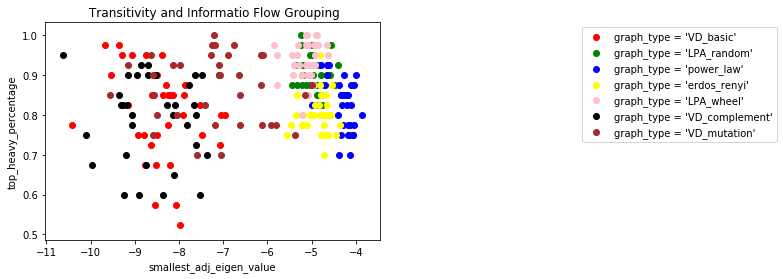

In [21]:
returned_pandas = g_stat.plot_df_values(total_df,
           x_column="smallest_adj_eigen_value",
           y_column="top_heavy_percentage",
#                    grouping=dict(n=dict(exact=[]),
#                                 p=dict(exact=[])),
                    grouping=dict(graph_type=dict(exact=[])),
                   plot_type="scatter",
                   title=" Transitivity and Informatio Flow Grouping",
                  value_restriction="",
                color_list=["red","green","blue","yellow",
                           "pink","black","brown"]
                                )

In [ ]:
transitivity_values = returned_pandas["transitivity"].to_numpy()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ax = plt.subplot()
getattr(ax,"hist")([transitivity_values[:20],transitivity_values[20:40],
         transitivity_values[40:60]],
             color = ['blue',
                      'yellow',
                      'green'], edgecolor = 'black')